In [33]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='JaOqDDAvkJ6tNGtqp4CP5g0Xh5YqRjvPIhuSByQ57vmH',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'flightdelay-donotdelete-pr-zjosjgoi24qmdr'
object_key = 'flightdata.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df= pd.read_csv(body)
df.head()


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [34]:
import sys
import numpy as np #Linear Algebra
import pandas as pd #Data Processing import seaborn as sns #Data Visualizaton
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder #LabelEncoding From Sklearn
from sklearn.preprocessing import OneHotEncoder #One-Hot Encoding From Sklearn
from sklearn.model_selection import train_test_split #Split Data in Train & Test Array
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier #ML Algorithm
from sklearn.metrics import accuracy_score #Calculate Accuracy Score
import sklearn.metrics as metrics #Confusion Matrix

Import Dataset

Dataset Analyses

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [36]:
df.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
count,11231.0,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,...,11231.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000,0.0
mean,2016.0,2.544475,6.628973,15.790758,3.960199,1334.325617,12334.516695,12302.274508,1320.798326,1327.189410,...,1537.312795,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965,NaN
std,0.0,1.090701,3.354678,8.782056,1.995257,811.875227,1595.026510,1601.988550,490.737845,500.306462,...,502.512494,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379,NaN
min,2016.0,1.000000,1.000000,1.000000,1.000000,7.000000,10397.000000,10397.000000,10.000000,1.000000,...,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000,NaN
25%,2016.0,2.000000,4.000000,8.000000,2.000000,624.000000,10397.000000,10397.000000,905.000000,905.000000,...,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000,NaN
50%,2016.0,3.000000,7.000000,16.000000,4.000000,1267.000000,12478.000000,12478.000000,1320.000000,1324.000000,...,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000,NaN
75%,2016.0,3.000000,9.000000,23.000000,6.000000,2032.000000,13487.000000,13487.000000,1735.000000,1739.000000,...,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000,NaN
max,2016.0,4.000000,12.000000,31.000000,7.000000,2853.000000,14747.000000,14747.000000,2359.000000,2400.000000,...,2359.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000,NaN


Handling Missing Values

In [37]:
df.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [38]:
df=df.fillna(df.mean())

Data Visualization 

Text(0.5, 1.0, 'Scatter plot')

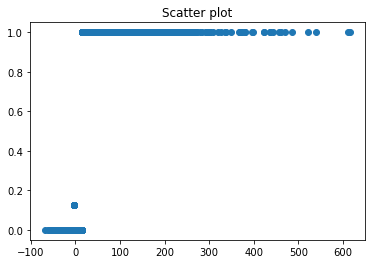

In [39]:
plt.scatter(df['ARR_DELAY'],df['ARR_DEL15'])
plt.title("Scatter plot")

Text(0.5, 1.0, 'Bar Chart')

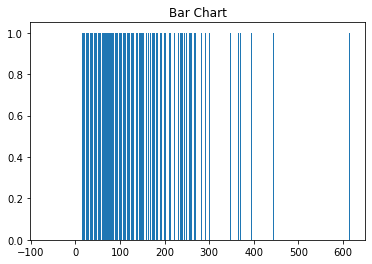

In [40]:
plt.bar(df['ARR_DELAY'],df['ARR_DEL15'])
plt.title("Bar Chart")

Text(0.5, 1.0, 'Histogram')

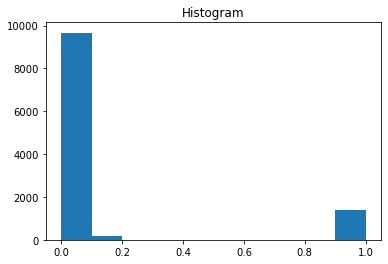

In [41]:
plt.hist(df['ARR_DEL15'])
plt.title("Histogram")

<AxesSubplot:xlabel='ARR_DELAY', ylabel='ARR_DEL15'>

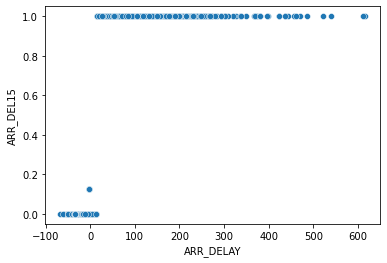

In [42]:
sns.scatterplot(df['ARR_DELAY'],df['ARR_DEL15'])

<AxesSubplot:xlabel='ARR_DELAY', ylabel='ARR_DEL15'>

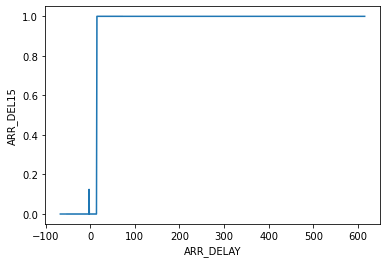

In [43]:
sns.lineplot(df['ARR_DELAY'],df['ARR_DEL15'])

<AxesSubplot:xlabel='ARR_DELAY', ylabel='ARR_DEL15'>

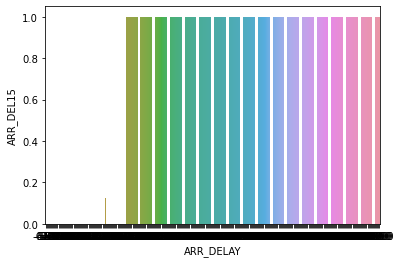

In [44]:
sns.barplot(df['ARR_DELAY'],df['ARR_DEL15'])

<AxesSubplot:xlabel='ARR_DEL15', ylabel='Count'>

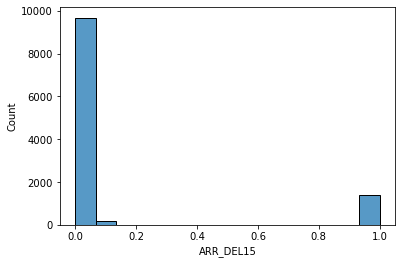

In [45]:
sns.histplot(df['ARR_DEL15'])

Droping Unnecessary Columns

In [46]:
X=df.drop(['YEAR','QUARTER','DAY_OF_WEEK','UNIQUE_CARRIER','DEP_DEL15','DEP_DELAY','ARR_TIME','ARR_DELAY','ARR_DEL15','CANCELLED','DIVERTED','CRS_ELAPSED_TIME','ACTUAL_ELAPSED_TIME','DISTANCE','Unnamed: 25','ORIGIN','DEST','TAIL_NUM'],axis='columns').astype(int)
y=df['ARR_DEL15'].astype(int)

In [47]:
X

,MONTH,DAY_OF_MONTH,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,CRS_ARR_TIME
0,1,1,1399,10397,14747,1905,1907,2143
1,1,1,1476,11433,13487,1345,1344,1435
2,1,1,1597,10397,14747,940,942,1215
3,1,1,1768,14747,13487,819,820,1335
4,1,1,1823,14747,11433,2300,2256,607
...,...,...,...,...,...,...,...,...
11226,12,30,1715,11433,10397,1005,1003,1223
11227,12,30,1770,14747,13487,1525,1559,2046
11228,12,30,1823,11433,14747,1959,1959,2210
11229,12,30,1901,10397,14747,1530,1529,1806


In [48]:
y

0        0
1        0
2        0
3        0
4        0
        ..
11226    0
11227    0
11228    0
11229    0
11230    0
Name: ARR_DEL15, Length: 11231, dtype: int64

Label Encoder

In [49]:
labelencoder_X=LabelEncoder()
X=X.apply(LabelEncoder().fit_transform)

In [50]:
X.head(40)

,MONTH,DAY_OF_MONTH,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,CRS_ARR_TIME
0,0,0,335,0,4,423,890,836
1,0,0,361,1,3,250,570,450
2,0,0,392,0,4,131,329,314
3,0,0,429,4,3,82,247,390
4,0,0,441,4,1,532,1113,47
5,0,0,469,3,0,191,434,471
6,0,1,496,0,3,390,809,709
7,0,1,509,3,4,386,815,707
8,0,1,525,3,4,181,422,361
9,0,1,540,3,0,275,627,621


Split & train Dataset

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7861, 8)
(3370, 8)
(7861,)
(3370,)


Decision Tree Classifier 

In [53]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Evaluation

In [54]:
dt.score(X_train,y_train)

1.0

In [55]:
dt.score(X_test,y_test)

0.8913946587537092

In [56]:
predict=dt.predict(X_test)
predict

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
X_in=np.array([0,3,416,1,4,220,503,435])

In [58]:
y_pred=dt.predict([X_in])

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [59]:
y_pred

array([0])

In [60]:
pip install -U ibm-watson-machine-learning

Note: you may need to restart the kernel to use updated packages.


In [61]:
from ibm_watson_machine_learning import APIClient
import json

In [62]:
wml_credentials = {
    "apikey" : "Iz76NcBoPcq5gVF5Qby8Ltj7p-E4igMYeaNXaG3gFlTK",
    "url" : "https://us-south.ml.cloud.ibm.com"
}

In [63]:
wml_client = APIClient(wml_credentials)

In [64]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ------------------  ------------------------
ID                                    NAME                CREATED
c6241307-f2d8-4eeb-8363-a673177855d0  Flight_Delay_Space  2022-11-20T10:02:55.077Z
------------------------------------  ------------------  ------------------------


In [65]:
SPACE_ID = "c6241307-f2d8-4eeb-8363-a673177855d0"

In [66]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [67]:
wml_client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [68]:
import sklearn
sklearn.__version__

'1.0.2'

In [69]:
MODEL_NAME = 'Flight_Delay'
DEPLOYMENT_NAME = 'Flight_Delay_Space'
DEMO_MODEL = dt

In [70]:
#set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [71]:
#setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid,
}

In [72]:
#save model

model_details = wml_client.repository.store_model(
    model = DEMO_MODEL,
    meta_props = model_props,
    training_data = X_train,
    training_target = y_train
)

In [73]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'ARR_DEL15',
  'schemas': {'input': [{'fields': [{'name': 'MONTH', 'type': 'int64'},
      {'name': 'DAY_OF_MONTH', 'type': 'int64'},
      {'name': 'FL_NUM', 'type': 'int64'},
      {'name': 'ORIGIN_AIRPORT_ID', 'type': 'int64'},
      {'name': 'DEST_AIRPORT_ID', 'type': 'int64'},
      {'name': 'CRS_DEP_TIME', 'type': 'int64'},
      {'name': 'DEP_TIME', 'type': 'int64'},
      {'name': 'CRS_ARR_TIME', 'type': 'int64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-20T10:15:49.793Z',
  'id': '17d29688-86d0-4f1b-aec5-5ea50eea0a53',
  'modified_at': '2022-11-20T10:15:53.361Z',
  'name': 'Flight_Delay',
  'owner': 'IBMid-667000F262',
  'resource_key': 'ed3467ba-453f-4c62-879a-cd0afbcd98fc',
  'space_id': 'c6241307-f2d8-4eeb-8363-a673177855d0

In [74]:
model_id = wml_client.repository.get_model_id(model_details)
model_id

'17d29688-86d0-4f1b-aec5-5ea50eea0a53'

In [75]:
#Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [76]:
#Deploy
deployment = wml_client.deployments.create(
    artifact_uid = model_id,
    meta_props = deployment_props
)



#######################################################################################

Synchronous deployment creation for uid: '17d29688-86d0-4f1b-aec5-5ea50eea0a53' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='c6bb7dc9-da68-4a21-a9f0-93355cc2208e'
------------------------------------------------------------------------------------------------


